In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/joanbency/Project/cardio_train.csv", sep=';')

In [3]:
corr_matrix = data.corr()

In [4]:
corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


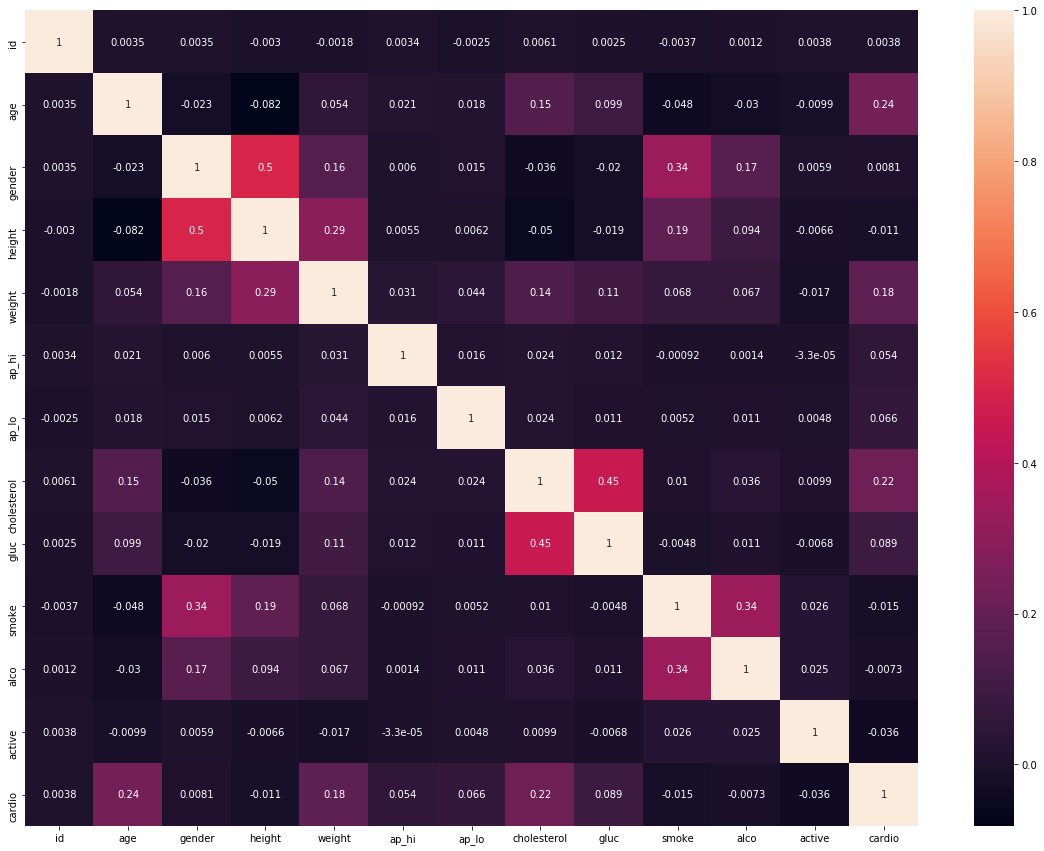

In [5]:
plt.subplots(figsize=(20,15))
sn.heatmap(corr_matrix,annot=True)
plt.show()

In [6]:
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
y = data.iloc[:,12]

In [7]:
x[:5]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [9]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [10]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [11]:
sc_X = StandardScaler()

In [12]:
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.fit_transform(X_Test)

In [13]:
#sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
#sel.fit(X_Train, Y_Train)
#sel.get_support()

In [14]:
classifier = RandomForestRegressor(n_estimators=100, min_samples_split=1000)

In [15]:
classifier.fit(X_Train, Y_Train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=1000,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
Y_Pred_rand = classifier.predict(X_Test)

In [17]:
classifier.score(X_Test, Y_Test)

0.24454265030497413

In [18]:
logreg = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

logreg.fit(X_Train, Y_Train)

Y_Pred_log = logreg.predict(X_Test)

In [19]:
logreg.score(X_Test, Y_Test)

0.7137857142857142

In [20]:
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

Y_Pred_lin = regressor.predict(X_Test)

In [21]:
regressor.score(X_Test, Y_Test)

0.11671747963436908

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
knn.score(X_Test, Y_Test)

0.6017142857142858

In [24]:
Y_Pred_knn = knn.predict(X_Test)

In [26]:
print(classification_report(Y_Test, Y_Pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      7069
           1       0.60      0.58      0.59      6931

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.60     14000
weighted avg       0.60      0.60      0.60     14000



In [27]:
classifier_svm = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
classifier_svm.fit(X_Train, Y_Train)

In [207]:
Y_Pred_svm = classifier_svm.predict(X_Test)

In [208]:
classifier_svm.score(X_Test, Y_Test)

0.7218571428571429

In [209]:
print(classification_report(Y_Test, Y_Pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      7069
           1       0.73      0.69      0.71      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

